In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',200)
pd.set_option('display.float_format', '{:,.2f}'.format)
sns.set_style("whitegrid")

In [16]:
df = pd.read_csv('../data/raw/MachineLearningRating_v3.txt', delimiter='|', low_memory=False)

In [17]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,Province,PostalCode,MainCrestaZone,SubCrestaZone,ItemType,mmcode,VehicleType,RegistrationYear,make,Model,Cylinders,cubiccapacity,kilowatts,bodytype,NumberOfDoors,VehicleIntroDate,CustomValueEstimate,AlarmImmobiliser,TrackingDevice,CapitalOutstanding,NewVehicle,WrittenOff,Rebuilt,Converted,CrossBorder,NumberOfVehiclesInFleet,SumInsured,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,119300.00,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,119300.00,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [19]:
df.dtypes

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

In [40]:
df.describe()

,UnderwrittenCoverID,PolicyID,TransactionMonth,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,"1,000,098.00","1,000,098.00",1000098,"1,000,098.00","999,546.00","1,000,098.00","999,546.00","999,546.00","999,546.00","999,546.00","220,456.00",0.00,"1,000,098.00","1,000,098.00","1,000,098.00","1,000,098.00"
mean,"104,817.55","7,956.68",2015-02-28 10:49:29.147423744,"3,020.60","54,877,704.02","2,010.23",4.05,"2,466.74",97.21,4.02,"225,531.13",NaN,"604,172.73",117.88,61.91,64.86
min,1.00,14.00,2013-10-01 00:00:00,1.00,"4,041,200.00","1,987.00",0.00,0.00,0.00,0.00,"20,000.00",NaN,0.01,0.00,-782.58,"-12,002.41"
25%,"55,143.00","4,500.00",2015-01-01 00:00:00,827.00,"60,056,925.00","2,008.00",4.00,"2,237.00",75.00,4.00,"135,000.00",NaN,"5,000.00",3.22,0.00,0.00
50%,"94,083.00","7,071.00",2015-04-01 00:00:00,"2,000.00","60,058,415.00","2,011.00",4.00,"2,694.00",111.00,4.00,"220,000.00",NaN,"7,500.00",8.44,2.18,0.00
75%,"139,190.00","11,077.00",2015-06-01 00:00:00,"4,180.00","60,058,418.00","2,013.00",4.00,"2,694.00",111.00,4.00,"280,000.00",NaN,"250,000.00",90.00,21.93,0.00
max,"301,175.00","23,246.00",2015-08-01 00:00:00,"9,870.00","65,065,350.00","2,015.00",10.00,"12,880.00",309.00,6.00,"26,550,000.00",NaN,"12,636,200.00","74,422.17","65,282.60","393,092.11"
std,"63,293.71","5,290.04",NaN,"2,649.85","13,603,805.34",3.26,0.29,442.80,19.39,0.47,"564,515.75",NaN,"1,508,331.84",399.70,230.28,"2,384.07"


### Check for missing values

In [21]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing = missing.sort_values(ascending=False)
print("Missing values in the dataset:")
print(missing)

Missing values in the dataset:
NumberOfVehiclesInFleet    1000098
CrossBorder                 999400
CustomValueEstimate         779642
Converted                   641901
Rebuilt                     641901
WrittenOff                  641901
NewVehicle                  153295
Bank                        145961
AccountType                  40232
Gender                        9536
MaritalStatus                 8259
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
NumberOfDoors                  552
VehicleIntroDate               552
Model                          552
make                           552
VehicleType                    552
mmcode                         552
bodytype                       552
CapitalOutstanding               2
dtype: int64


In [22]:
missing_precentage = (df.isnull().sum() / len(df))*100
missing_precentage[missing_precentage > 0].sort_values(ascending=False)

NumberOfVehiclesInFleet    100.000000
CrossBorder                 99.930207
CustomValueEstimate         77.956560
Converted                   64.183810
Rebuilt                     64.183810
WrittenOff                  64.183810
NewVehicle                  15.327998
Bank                        14.594670
AccountType                  4.022806
Gender                       0.953507
MaritalStatus                0.825819
Cylinders                    0.055195
cubiccapacity                0.055195
kilowatts                    0.055195
NumberOfDoors                0.055195
VehicleIntroDate             0.055195
Model                        0.055195
make                         0.055195
VehicleType                  0.055195
mmcode                       0.055195
bodytype                     0.055195
CapitalOutstanding           0.000200
dtype: float64

In [23]:
print(df[['TotalPremium', 'TotalClaims']].head())

   TotalPremium  TotalClaims
0     21.929825          0.0
1     21.929825          0.0
2      0.000000          0.0
3    512.848070          0.0
4      0.000000          0.0


In [24]:
min_claim = df['TotalClaims'].min()
print(f"Minimum Total Claim: {min_claim}")
max_claim = df['TotalClaims'].max()
print(f"Maximum Total Claim: {max_claim}")

Minimum Total Claim: -12002.412280701796
Maximum Total Claim: 393092.105263158


In [25]:
min_premium = df['TotalPremium'].min()
print(f"Minimum Total Premium: {min_premium}")
max_premium = df['TotalPremium'].max()
print(f"Maximum Total Premium: {max_premium}")

Minimum Total Premium: -782.576754385965
Maximum Total Premium: 65282.6034210526


In [26]:
overall_loss_ratio = df['TotalClaims'].sum() / df['TotalPremium'].sum()
print(f"Overall Loss Ratio: {overall_loss_ratio:.4f}")

Overall Loss Ratio: 1.0477


Loss Ratio by Province:
                TotalClaims  TotalPremium  LossRatio
Province                                            
Eastern Cape   1,356,426.66  2,140,103.83       0.63
Free State       354,922.27    521,363.24       0.68
Gauteng       29,394,148.48 24,053,774.58       1.22
KwaZulu-Natal 14,301,382.45 13,209,079.81       1.08
Limpopo        1,016,476.71  1,537,324.50       0.66
Mpumalanga     2,044,675.36  2,836,291.94       0.72
North West     5,920,250.00  7,490,508.18       0.79
Northern Cape     89,490.51    316,558.07       0.28
Western Cape  10,389,773.74  9,806,558.53       1.06


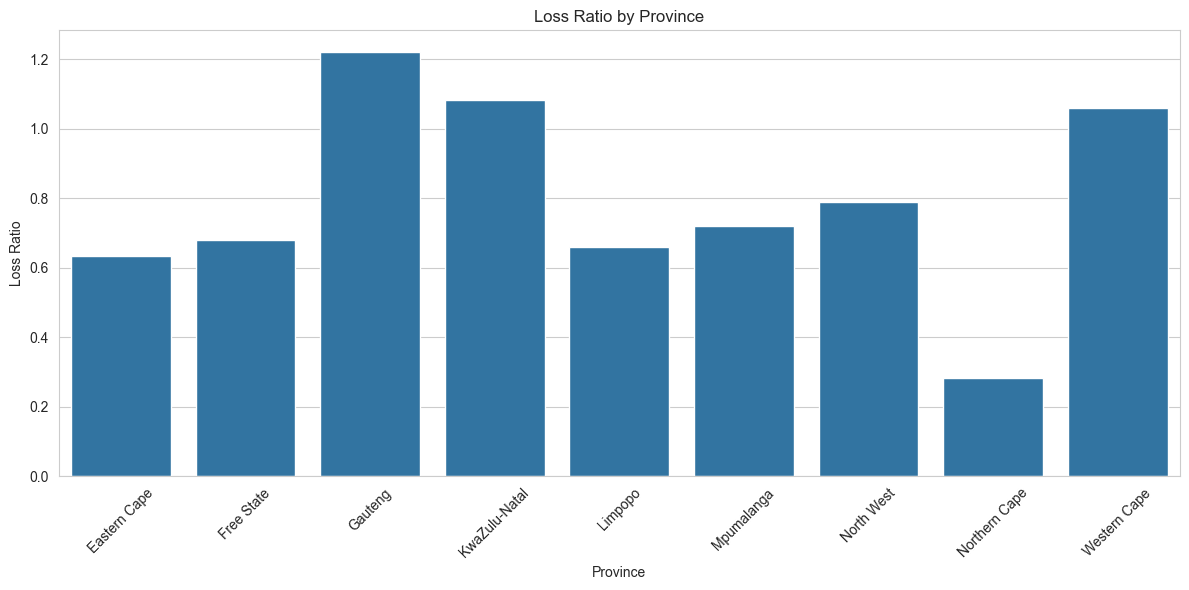

In [42]:
loss_ratio_by_province = df.groupby('Province')[['TotalClaims', 'TotalPremium']].sum()
loss_ratio_by_province['LossRatio'] = loss_ratio_by_province['TotalClaims'] / loss_ratio_by_province['TotalPremium']
print("Loss Ratio by Province:")
print(loss_ratio_by_province[['TotalClaims', 'TotalPremium', 'LossRatio']])
plt.figure(figsize=(12, 6))
sns.barplot(x=loss_ratio_by_province.index, y='LossRatio', data=loss_ratio_by_province.reset_index())
plt.title('Loss Ratio by Province')
plt.xlabel('Province')
plt.ylabel('Loss Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Loss Ratio by Vehicle Type:
                    TotalClaims  TotalPremium  LossRatio
VehicleType                                             
Heavy Commercial     750,474.58    460,947.86       1.63
Medium Commercial  4,119,866.90  3,922,745.55       1.05
Passenger Vehicle 59,372,069.68 56,642,016.58       1.05
Light Commercial      60,452.50    260,497.52       0.23
Bus                    7,996.54     58,244.74       0.14


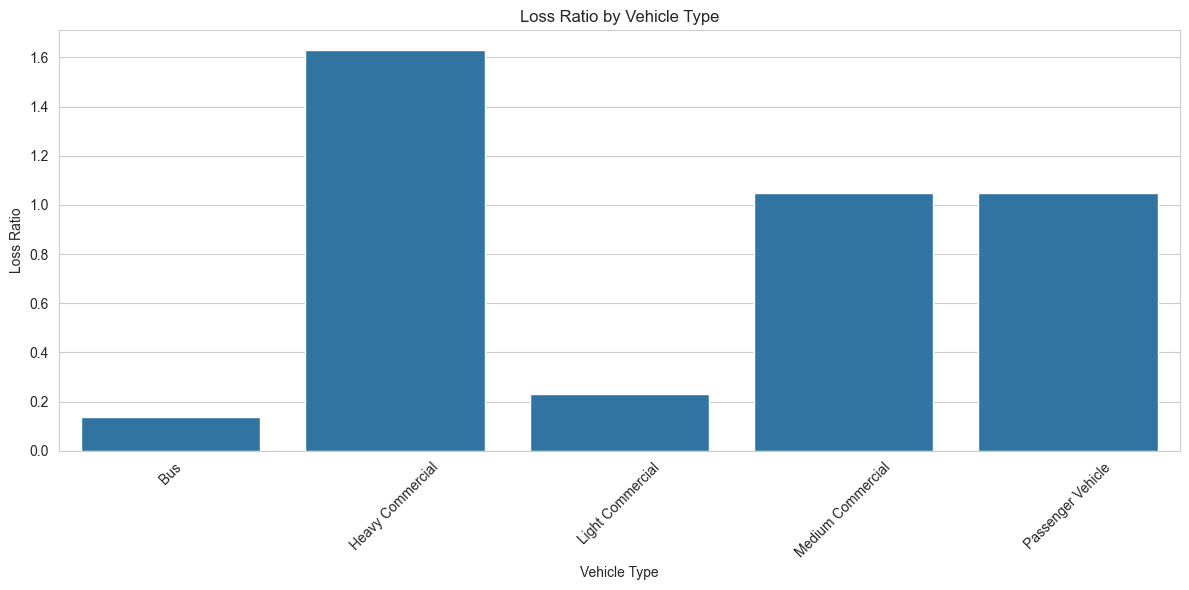

In [44]:
loss_ratio_by_vehicle = df.groupby('VehicleType')[['TotalClaims', 'TotalPremium']].sum()
loss_ratio_by_vehicle['LossRatio'] = loss_ratio_by_vehicle['TotalClaims'] / loss_ratio_by_vehicle['TotalPremium']
print("Loss Ratio by Vehicle Type:")
print(loss_ratio_by_vehicle.sort_values('LossRatio', ascending=False))
plt.figure(figsize=(12, 6))
sns.barplot(x=loss_ratio_by_vehicle.index, y='LossRatio', data=loss_ratio_by_vehicle.reset_index())
plt.title('Loss Ratio by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Loss Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Loss Ratio by Gender:
                TotalClaims  TotalPremium  LossRatio
Gender                                              
Not specified 62,714,103.07 59,202,752.22       1.06
Male           1,396,703.92  1,580,142.80       0.88
Female           250,246.10    304,480.55       0.82


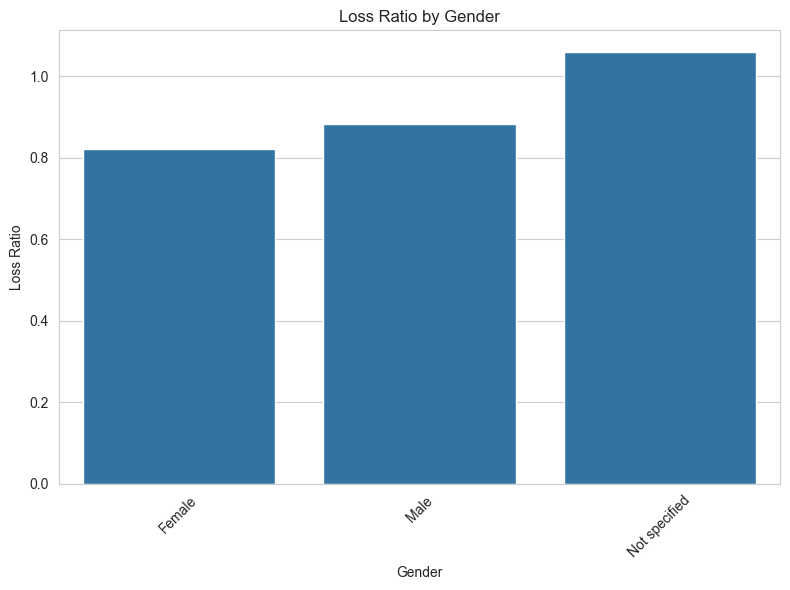

In [45]:
loss_ratio_by_gender = df.groupby('Gender')[['TotalClaims', 'TotalPremium']].sum()
loss_ratio_by_gender['LossRatio'] = loss_ratio_by_gender['TotalClaims'] / loss_ratio_by_gender['TotalPremium']
print("Loss Ratio by Gender:")
print(loss_ratio_by_gender.sort_values('LossRatio', ascending=False))
plt.figure(figsize=(8, 6))
sns.barplot(x=loss_ratio_by_gender.index, y='LossRatio', data=loss_ratio_by_gender.reset_index())
plt.title('Loss Ratio by Gender')
plt.xlabel('Gender')
plt.ylabel('Loss Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

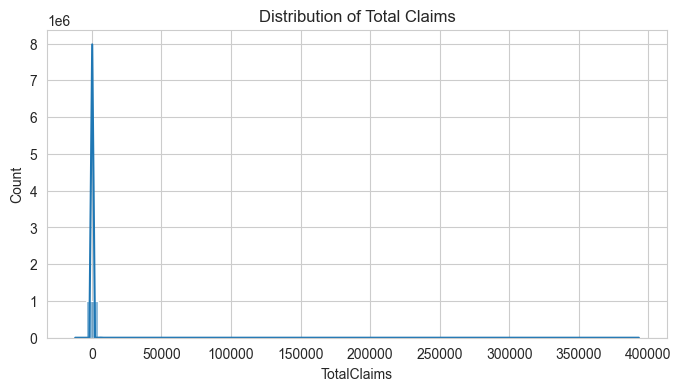

In [52]:
plt.figure(figsize=(8, 4))
sns.histplot(df['TotalClaims'], bins=50, kde=True)
plt.title("Distribution of Total Claims")
plt.xlabel("TotalClaims")
plt.show()


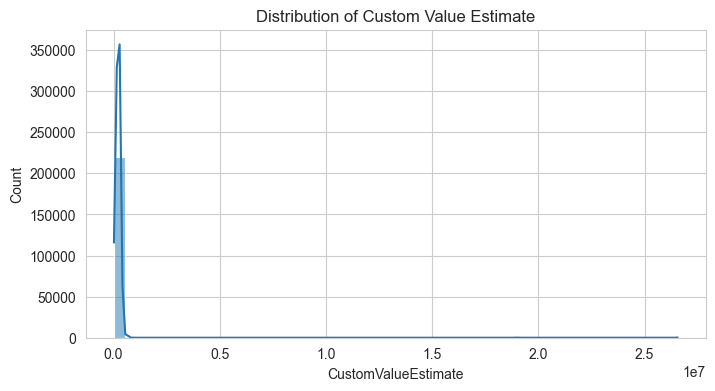

In [53]:
plt.figure(figsize=(8, 4))
sns.histplot(df['CustomValueEstimate'], bins=50, kde=True)
plt.title("Distribution of Custom Value Estimate")
plt.xlabel("CustomValueEstimate")
plt.show()

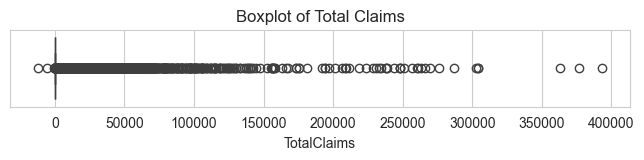

In [54]:
plt.figure(figsize=(8, 1))
sns.boxplot(x=df['TotalClaims'])
plt.title("Boxplot of Total Claims")
plt.show()

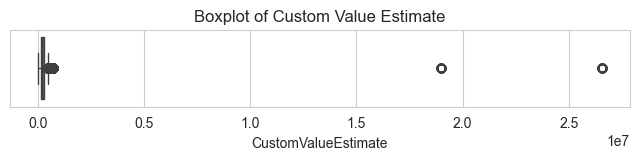

In [55]:
plt.figure(figsize=(8, 1))
sns.boxplot(x=df['CustomValueEstimate'])
plt.title("Boxplot of Custom Value Estimate")
plt.show()

In [56]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')
df['ClaimOccurred'] = df['TotalClaims'] > 0

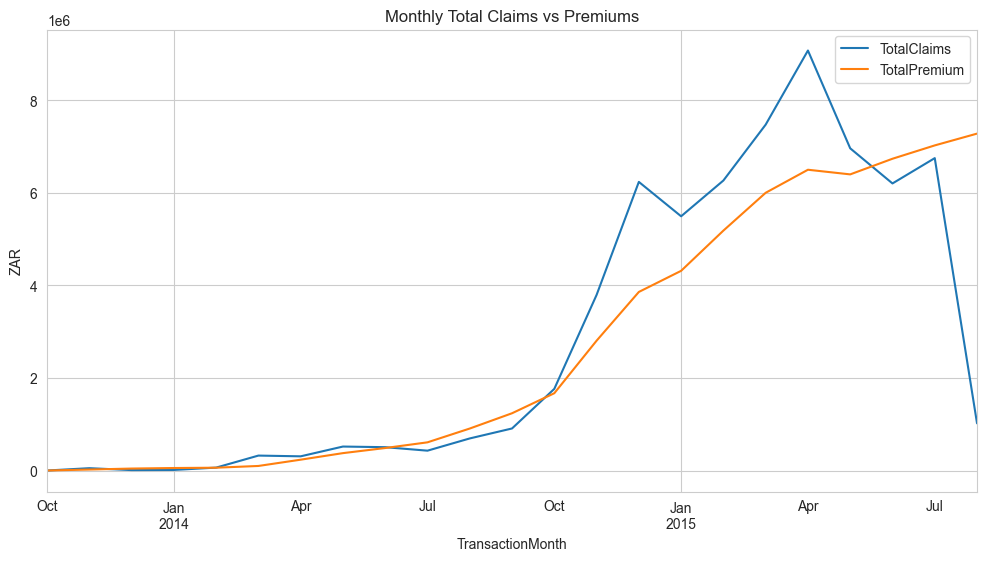

In [57]:
monthly_totals = df.groupby(df['TransactionMonth'].dt.to_period('M'))[['TotalClaims', 'TotalPremium']].sum()
monthly_totals.index = monthly_totals.index.to_timestamp()

monthly_totals.plot(figsize=(12, 6), title="Monthly Total Claims vs Premiums")
plt.ylabel("ZAR")
plt.show()

In [58]:
monthly_freq = df.groupby(df['TransactionMonth'].dt.to_period('M'))['ClaimOccurred'].mean()
monthly_freq.index = monthly_freq.index.to_timestamp()

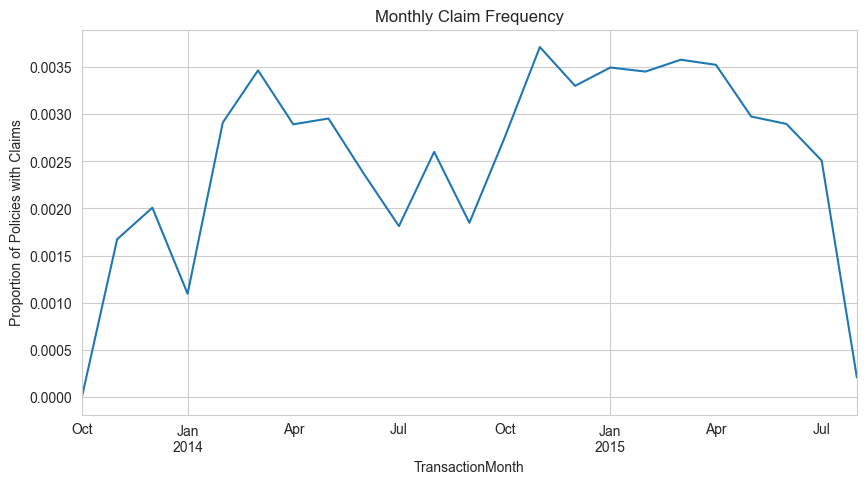

In [ ]:
monthly_freq.plot(figsize=(10, 5), title="Monthly Claim Frequency")
plt.ylabel("Proportion of Policies with Claims")
plt.show()

In [60]:
claim_by_make_model = df.groupby(['make', 'Model'])['TotalClaims'].sum().sort_values(ascending=False)

In [62]:
print("Top 10 Makes/Models by Total Claims:")
print(claim_by_make_model.head(10))

Top 10 Makes/Models by Total Claims:
make           Model                           
TOYOTA         QUANTUM 2.7 SESFIKILE 16s          12,037,503.51
               QUANTUM 2.7 SESFIKILE 15s          11,511,734.20
               QUANTUM 2.7 SESFIKILE 14s           9,967,764.31
               QUANTUM 2.5 D-4D SESFIKILE 16s      7,733,235.87
               HiACE SUPER 16 F/Lift               3,275,204.90
               HiACE SIYAYA                        1,727,755.66
               QUANTUM 2.5 D-4D 14 SEAT            1,339,541.06
CMC            AMANDLA 2.2                         1,106,006.97
TOYOTA         AVANZA 1.5 SX                       1,089,784.60
MERCEDES-BENZ  SPRINTER 515 CDi HI-ROOF F/C P/V      887,416.06
Name: TotalClaims, dtype: float64


In [63]:
print("Bottom 10 Makes/Models by Total Claims (non-zero):")
print(claim_by_make_model[claim_by_make_model > 0].tail(10))

Bottom 10 Makes/Models by Total Claims (non-zero):
make                                 Model                         
MERCEDES-BENZ                        SPRINTER 519 CDI XL F/C P/V      1,317.93
NISSAN                               ALMERA 1.6 LUXURY A/T (H16/27)   1,225.00
MERCEDES-BENZ                        SPRINTER 518 CDI D/C F/C C/C     1,140.35
                                     SPRINTER 308 CDI F/C C/C         1,140.35
TOYOTA                               COROLLA 1.6 ESTEEM                 850.00
FIAT                                 DUCATO 2.3 JTD F/C C/C             850.00
TOYOTA                               COROLLA 140i                       850.00
MERCEDES-BENZ                        C200K ESTATE CLASSIC               850.00
CMC                                  SESBUYILE 2.5 TDi 16 SEAT          750.65
VOLKSWAGEN                           CITI.COM 1.4i                      570.50
Name: TotalClaims, dtype: float64


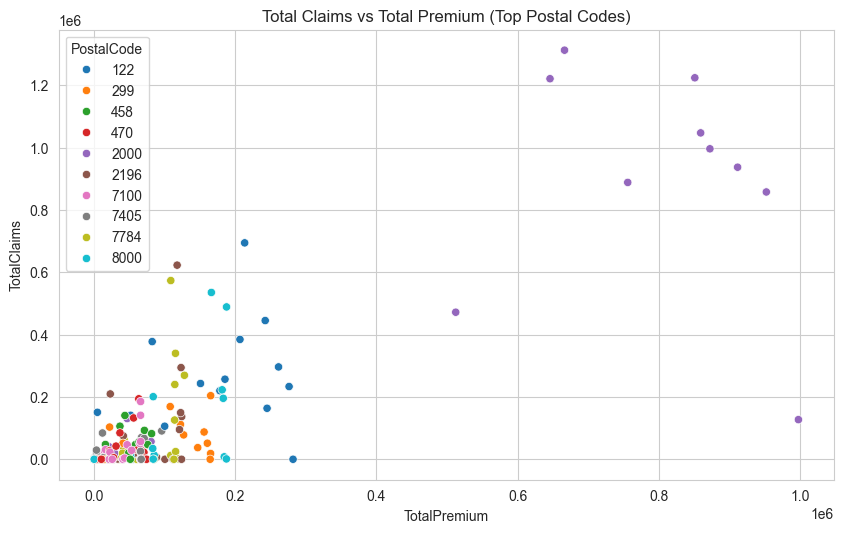

In [66]:
top_postal_codes = df['PostalCode'].value_counts().head(10).index
filtered_df = df[df['PostalCode'].isin(top_postal_codes)]

monthly_grouped = filtered_df.groupby([filtered_df['TransactionMonth'].dt.to_period('M'), 'PostalCode'])[['TotalPremium', 'TotalClaims']].sum().reset_index()
monthly_grouped['TransactionMonth'] = monthly_grouped['TransactionMonth'].dt.to_timestamp()

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=monthly_grouped, x='TotalPremium', y='TotalClaims', hue='PostalCode', palette='tab10', ax=ax)
plt.title('Total Claims vs Total Premium (Top Postal Codes)')
plt.subplots_adjust(top=0.9, bottom=0.15)
plt.show()


In [76]:
corr_matrix = df[['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 'CalculatedPremiumPerTerm']].corr()
summary_stats = df[['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 'CalculatedPremiumPerTerm']].describe()
print("Summary Statistics:")
print(summary_stats)


Summary Statistics:
       TotalPremium  TotalClaims  CustomValueEstimate  \
count  1,000,098.00 1,000,098.00           220,456.00   
mean          61.91        64.86           225,531.13   
std          230.28     2,384.07           564,515.75   
min         -782.58   -12,002.41            20,000.00   
25%            0.00         0.00           135,000.00   
50%            2.18         0.00           220,000.00   
75%           21.93         0.00           280,000.00   
max       65,282.60   393,092.11        26,550,000.00   

       CalculatedPremiumPerTerm  
count              1,000,098.00  
mean                     117.88  
std                      399.70  
min                        0.00  
25%                        3.22  
50%                        8.44  
75%                       90.00  
max                   74,422.17  


Text(0.5, 1.0, 'Correlation Matrix of Financial Variables')

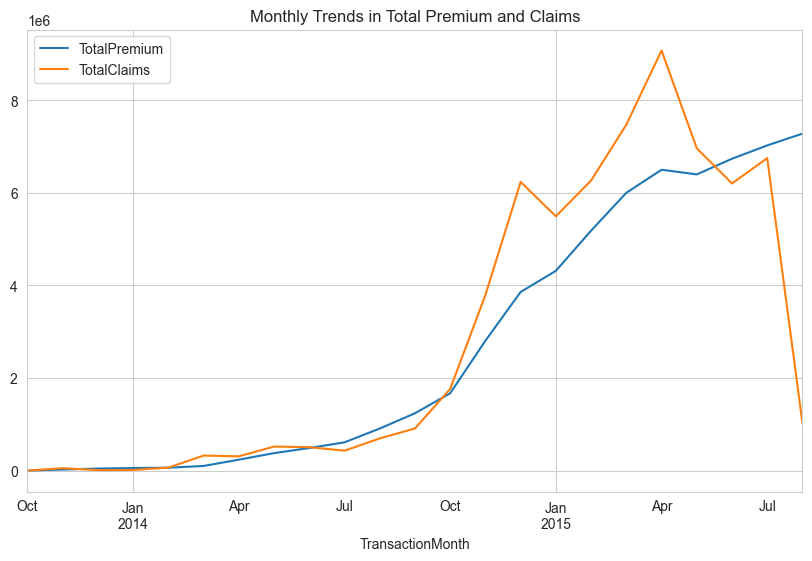

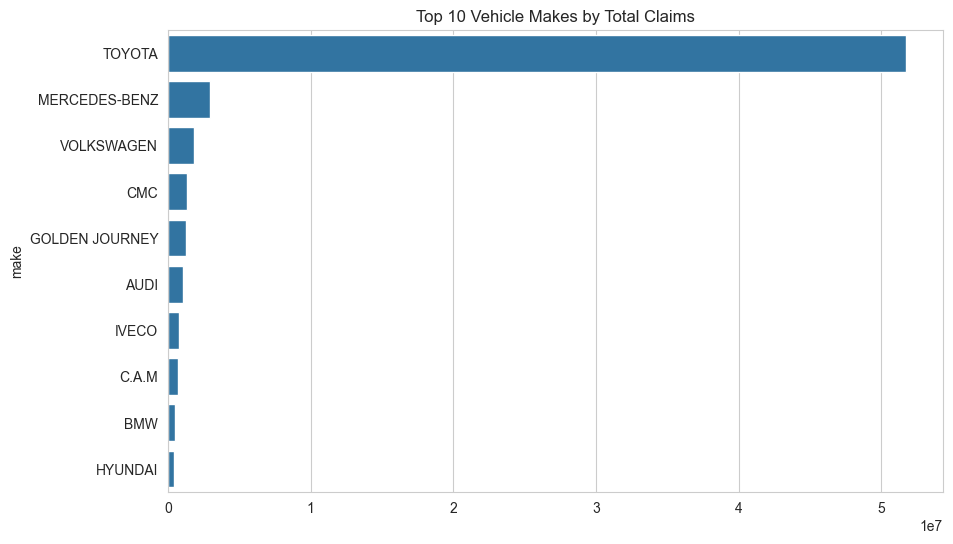

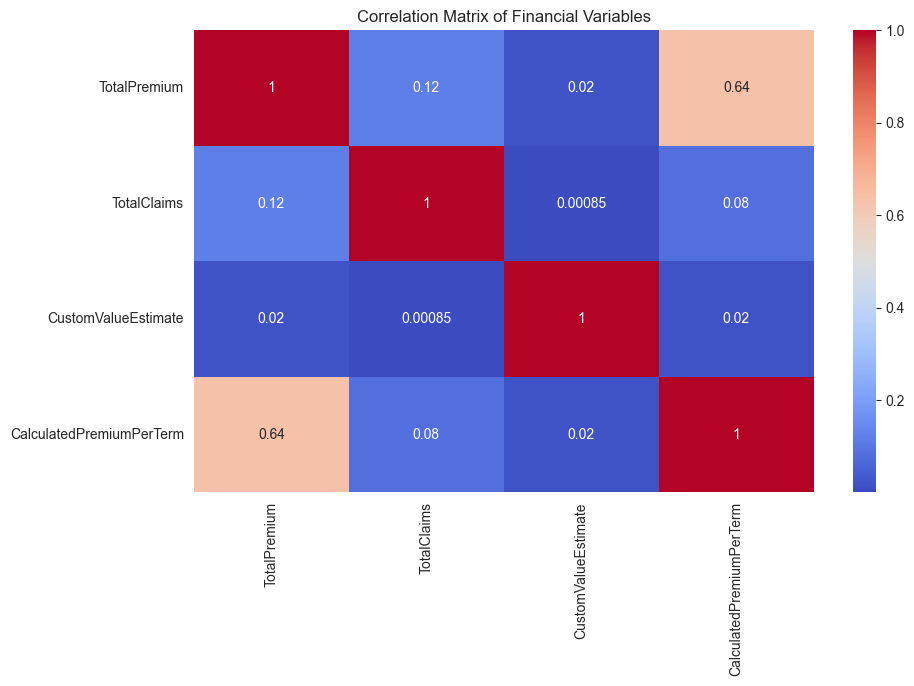

In [77]:

fig1 = plt.figure(figsize=(10, 6))
monthly_trends = df.groupby(df['TransactionMonth'].dt.to_period('M'))[['TotalPremium', 'TotalClaims']].sum()
monthly_trends.index = monthly_trends.index.to_timestamp()
monthly_trends.plot(ax=plt.gca(), title='Monthly Trends in Total Premium and Claims')

fig2 = plt.figure(figsize=(10, 6))
top_makes = df.groupby('make')['TotalClaims'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_makes.values, y=top_makes.index).set_title('Top 10 Vehicle Makes by Total Claims')

fig3 = plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm').set_title('Correlation Matrix of Financial Variables')

In [78]:
print("Missing values in the dataset:")
missing.head(10), df.dtypes.head(10)

Missing values in the dataset:


(NumberOfVehiclesInFleet    1000098
 CrossBorder                 999400
 CustomValueEstimate         779642
 Converted                   641901
 Rebuilt                     641901
 WrittenOff                  641901
 NewVehicle                  153295
 Bank                        145961
 AccountType                  40232
 Gender                        9536
 dtype: int64,
 UnderwrittenCoverID             int64
 PolicyID                        int64
 TransactionMonth       datetime64[ns]
 IsVATRegistered                  bool
 Citizenship                    object
 LegalType                      object
 Title                          object
 Language                       object
 Bank                           object
 AccountType                    object
 dtype: object)